<a href="https://colab.research.google.com/github/khadija267/Sign-Language-Classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

some function to help us to plot relationships between some variables 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "VGG_MNIST"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

A couple utility functions to plot grayscale and RGB images:

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

# Import the Keras API from Tensorflow

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras import backend as K
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(yTRUE,yPREDICT):
    """If you prefer color and a colorbar"""
  
    conf_mxaug = confusion_matrix(yTRUE, yPREDICT)
    print('\n Confusion matrix: \n\n{0}'.format(conf_mxaug))
    print('\n')
    hm = sns.heatmap(conf_mxaug, annot = True)

    hm.set(title = "Confusion matrix of test data\n")

    plt.show()
    

#Read Data 

we read data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## resize images 30 * 40
read the data and resize the images into 30*40

In [ ]:
from skimage import io
from skimage.transform import resize

def ReSize(path ):
    images =io.imread_collection(path)
    data = []
    for img in images:  
        res = resize(img,(30,40),anti_aliasing=True)
        data.append(res)

    return data 

create the data (train and test data)

In [ ]:
'''
Call_me=ReSize("/content/drive/MyDrive/data_team/Call me/*.jpg")
Dislike=ReSize("/content/drive/MyDrive/data_team/Dislike/*.jpg")
Good_luck=ReSize("/content/drive/MyDrive/data_team/Good luck/*.JPG")
Goodjob=ReSize("/content/drive/MyDrive/data_team/Goodjob/*.jpg")
I_love_you=ReSize("/content/drive/MyDrive/data_team/I love you/*.JPG")
OK=ReSize("/content/drive/MyDrive/data_team/OK/*.jpg")
Peace=ReSize("/content/drive/MyDrive/data_team/Peace/*.jpg")
Power=ReSize("/content/drive/MyDrive/data_team/Power/*.jpg")
Talk_to_the_hand=ReSize("/content/drive/MyDrive/data_team/Talk to the hand/*.jpg")
You=ReSize("/content/drive/MyDrive/data_team/You/*.jpg")
data=Call_me+Dislike+Good_luck+Goodjob+I_love_you+OK+Peace+Power+Talk_to_the_hand+You
'''
Call_me=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/Call me/*.jpg")
Dislike=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/Dislike/*.jpg")
Good_luck=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/Good luck/*.JPG")
Goodjob=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/Goodjob/*.jpg")
I_love_you=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/I love you/*.JPG")
OK=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/OK/*.jpg")
Peace=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/Peace/*.jpg")
Power=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/Power/*.jpg")
Talk_to_the_hand=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/Talk to the hand/*.jpg")
You=ReSize("/content/drive/MyDrive/computer vision_lab/data_team/You/*.jpg")
data=Call_me+Dislike+Good_luck+Goodjob+I_love_you+OK+Peace+Power+Talk_to_the_hand+You

In [ ]:
data


[array([[[0.30196078, 0.30980392, 0.29803922],
         [0.30196078, 0.30980392, 0.29803922],
         [0.29803922, 0.30588235, 0.29411765],
         ...,
         [0.10980392, 0.11764706, 0.10588235],
         [0.11372549, 0.12156863, 0.10980392],
         [0.11764706, 0.1254902 , 0.11372549]],
 
        [[0.30980392, 0.31764706, 0.30588235],
         [0.30588235, 0.31372549, 0.30196078],
         [0.30196078, 0.30980392, 0.29803922],
         ...,
         [0.10980392, 0.11764706, 0.10588235],
         [0.11372549, 0.12156863, 0.10980392],
         [0.11372549, 0.12156863, 0.10980392]],
 
        [[0.30980392, 0.31764706, 0.30588235],
         [0.30980392, 0.31764706, 0.30588235],
         [0.30588235, 0.31372549, 0.30196078],
         ...,
         [0.10588235, 0.11372549, 0.10196078],
         [0.10980392, 0.11764706, 0.10588235],
         [0.11372549, 0.11372549, 0.10588235]],
 
        ...,
 
        [[0.22352941, 0.24705882, 0.23921569],
         [0.21176471, 0.23529412, 0.22745

create the label to data

In [ ]:
Y=[0]*46+[1]*50+[2]*79+[3]*50+[4]*49+[5]*50+[6]*50+[7]*50+[8]*50+[9]*50


### split train into train and validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)
x_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
y_train=np.array(y_train)

y_train = y_train.reshape(y_train.shape[0],1)


convert the lists into array then reshape them

In [ ]:
x_train=np.array(x_train)
X_test=np.array(X_test)
X_val=np.array(X_val)
x_train = x_train.reshape(x_train.shape[0],30, 40, 3)
X_test = X_test.reshape(X_test.shape[0],30, 40, 3)
X_val = X_val.reshape(X_val.shape[0],30, 40, 3)


Turn the numbers into one-hot vectors

In [ ]:
nClasses =10
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_val_k = tensorflow.keras.utils.to_categorical(y_val, num_classes=(nClasses))


See if it worked

In [ ]:
for i in range(len(y_train)):
    print(y_train[i], " ", y_train_k[i,:])


[7]   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2]   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[8]   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2]   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[5]   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[8]   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0]   [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[5]   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[9]   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[7]   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[7]   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[4]   [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[7]   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1]   [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[4]   [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2]   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[7]   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0]   [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[6]   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[5]   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[8]   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[8]   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[5]   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[4]   [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[8]   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2]   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2]   [0. 0.

# model Training

* With "SAME" padding, if you use a stride of 1, the layer's outputs will have the same spatial dimensions as its inputs
* using activation function ReLU as it does not activate all the neurons at the same time. Due to this reason, during the backpropogation process, the weights and biases for some neurons are not updated.
* using Softmax is the output probabilities range. The range will 0 to 1, and the sum of all the probabilities will be equal to one. used it  for multi-classification model as it returns the probabilities of each class and the target class will have the high probability.

In [ ]:
num_classes = 10

model = Sequential([
  # layers.Rescaling(1./255, input_shape=(30, 40, 3)),
  layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(30, 40, 3)),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.Conv2D(32,(3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(16, (3,3) ,padding='same', activation='relu'),
  layers.Conv2D(64, (3,3) ,padding='same', activation='relu'),
  layers.Conv2D(64, (3,3) ,padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),

  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 40, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 30, 40, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 20, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 20, 32)        9

## optimizer Adam
Adam optimizer involves a combination of two gradient descent methodologies: 
* Momentum: 
This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the ‘exponentially weighted average’ of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace.
* Root Mean Square Propagation (RMSP): 
Root mean square prop or RMSprop is an adaptive learning algorithm that tries to improve AdaGrad. Instead of taking the cumulative sum of squared gradients like in AdaGrad, it takes the ‘exponential moving average’.


 



## loss function categorical_crossentropy
categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1. The output label, if present in integer form, is converted into categorical encoding using keras.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])
#eepochs=50

history = model.fit(x_train,y_train_k,validation_data=(X_val,y_val_k),epochs=100)

Epoch 1/100
11/11 [==============================] - 3s 82ms/step - loss: 1.9356 - accuracy: 0.4119 - val_loss: 2.2934 - val_accuracy: 0.1190
Epoch 2/100
11/11 [==============================] - 0s 19ms/step - loss: 0.7207 - accuracy: 0.7582 - val_loss: 2.2702 - val_accuracy: 0.1905
Epoch 3/100
11/11 [==============================] - 0s 20ms/step - loss: 0.3520 - accuracy: 0.8836 - val_loss: 2.2467 - val_accuracy: 0.2381
Epoch 4/100
11/11 [==============================] - 0s 20ms/step - loss: 0.1548 - accuracy: 0.9582 - val_loss: 2.2435 - val_accuracy: 0.3214
Epoch 5/100
11/11 [==============================] - 0s 19ms/step - loss: 0.1124 - accuracy: 0.9672 - val_loss: 2.2428 - val_accuracy: 0.1786
Epoch 6/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0833 - accuracy: 0.9701 - val_loss: 2.2381 - val_accuracy: 0.1905
Epoch 7/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0629 - accuracy: 0.9851 - val_loss: 2.2127 - val_accuracy: 0.2143
Epoch 

confustion matrix for test dataset


 Confusion matrix: 

[[11  0  0  0  0  0  0  0  0  1]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  1  1  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  2  0  0  0 11]]




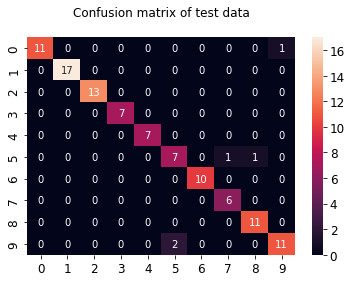

Saving figure model_confusion_matrix_errors


<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       0.78      0.78      0.78         9
           6       1.00      1.00      1.00        10
           7       0.86      1.00      0.92         6
           8       0.92      1.00      0.96        11
           9       0.92      0.85      0.88        13

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



In [ ]:
from sklearn.metrics import classification_report

y_predict_prob = model.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)
plot_confusion_matrix(y_test, y_predict)
save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()
print(classification_report(y_test, y_predict, target_names=['0','1','2','3','4','5','6','7','8','9'] ))


confusion matrix for train daatset


 Confusion matrix: 

[[29  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  0 32]]




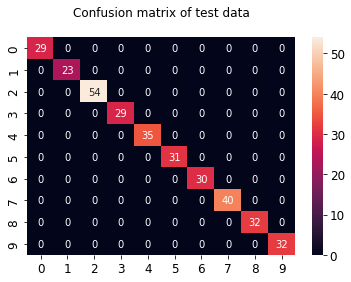

Saving figure model_confusion_matrix_errors


<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        32

    accuracy                           1.00       335
   macro avg       1.00      1.00      1.00       335
weighted avg       1.00      1.00      1.00       335



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_predict_prob_train = model.predict(x_train)
y_predict_train= y_predict_prob_train.argmax(axis=-1)
conf_mx_train = confusion_matrix(y_train, y_predict_train)

plot_confusion_matrix(y_train, y_predict_train)
save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()
print(classification_report(y_train, y_predict_train, target_names=['0','1','2','3','4','5','6','7','8','9'] ))



confustion matrix for validation dataset


 Confusion matrix: 

[[ 5  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  3  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  1  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  5]]




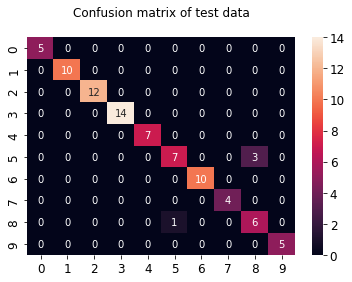

Saving figure model_confusion_matrix_errors


<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         7
           5       0.88      0.70      0.78        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         4
           8       0.67      0.86      0.75         7
           9       1.00      1.00      1.00         5

    accuracy                           0.95        84
   macro avg       0.95      0.96      0.95        84
weighted avg       0.96      0.95      0.95        84



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_predict_prob_val= model.predict(X_val)
y_predict_val= y_predict_prob_val.argmax(axis=-1)
conf_mx_val= confusion_matrix(y_val, y_predict_val)

plot_confusion_matrix(y_val, y_predict_val)
save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()
print(classification_report(y_val, y_predict_val, target_names=['0','1','2','3','4','5','6','7','8','9'] ))


##  comparison between results

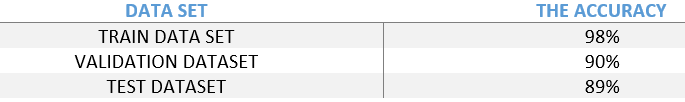

# Training History Visualization 

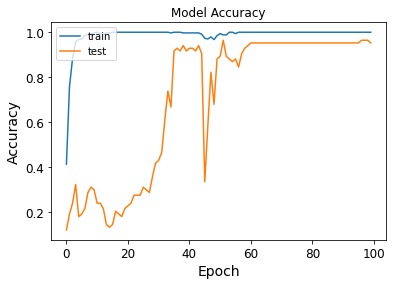

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


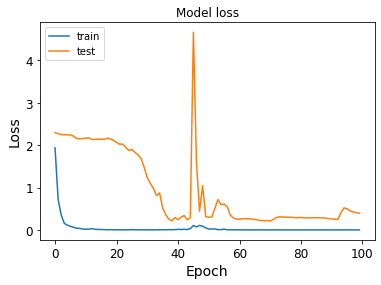

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



####Image Augmentation With flips and rotate


In [ ]:
training_datagen = ImageDataGenerator(
    
	    rotation_range=40,
      shear_range=0.2,
      brightness_range=[0.2,1.0],
      zoom_range=[0.5,1.0],
      horizontal_flip=True,
      fill_mode='nearest')

training_datagen.fit(x_train)


In [ ]:
train_generator = training_datagen.flow(
	x_train,y_train_k,
  batch_size=16
)

In [ ]:
x_train_ag=np.array(x_train)


x_train_ag = x_train_ag.reshape(x_train_ag.shape[0],30,40,3)



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_ag = model.fit(x_train_ag,y_train_k,validation_data=(X_val,y_val_k),epochs=100)



# modelaug = vgg_model_reg.fit(
#         train_generator,
#         steps_per_epoch=30 ,
#         epochs=50,
#         validation_data=(valx, y_val_k),
#         validation_steps=30 )

Epoch 1/100
11/11 [==============================] - 1s 53ms/step - loss: 0.0064 - accuracy: 0.9970 - val_loss: 2.3868 - val_accuracy: 0.6310
Epoch 2/100
11/11 [==============================] - 0s 25ms/step - loss: 0.0081 - accuracy: 0.9970 - val_loss: 1.2675 - val_accuracy: 0.8095
Epoch 3/100
11/11 [==============================] - 0s 26ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 1.2680 - val_accuracy: 0.7619
Epoch 4/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6923 - val_accuracy: 0.8810
Epoch 5/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 1.1772 - val_accuracy: 0.7500
Epoch 6/100
11/11 [==============================] - 0s 24ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.2534 - val_accuracy: 0.6071
Epoch 7/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.8315 - val_accuracy: 0.6429
Epoch 

# confusion_matrix for test data after  augmentation 


 Confusion matrix: 

[[12  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  1  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 1  0  0  0  0  1  0  0  0 11]]




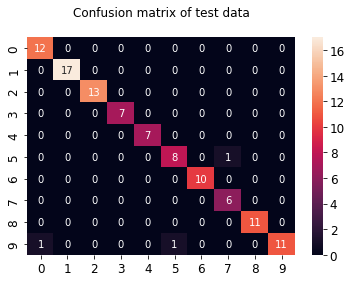

Saving figure model_confusion_matrix_errors


<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       0.89      0.89      0.89         9
           6       1.00      1.00      1.00        10
           7       0.86      1.00      0.92         6
           8       1.00      1.00      1.00        11
           9       1.00      0.85      0.92        13

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_predict_prob_test_ag = model.predict(X_test)
y_predict_test_ag= y_predict_prob_test_ag.argmax(axis=-1)
conf_mx_test_ag = confusion_matrix(y_test, y_predict_test_ag)

plot_confusion_matrix(y_test, y_predict_test_ag)
save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()
print(classification_report(y_test, y_predict_test_ag, target_names=['0','1','2','3','4','5','6','7','8','9'] ))



# confustion matrix for validation dataset after agumentation






 Confusion matrix: 

[[ 5  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 1  0  0  0  0  7  0  0  2  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  1  0  1  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  5]]




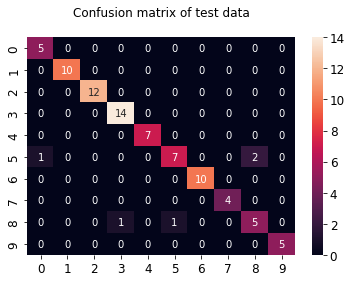

Saving figure model_confusion_matrix_errors


<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       0.93      1.00      0.97        14
           4       1.00      1.00      1.00         7
           5       0.88      0.70      0.78        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         4
           8       0.71      0.71      0.71         7
           9       1.00      1.00      1.00         5

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_predict_prob_val_ag = model.predict(X_val)
y_predict_val_ag= y_predict_prob_val_ag.argmax(axis=-1)
conf_mx_val_ag = confusion_matrix(y_val, y_predict_val_ag)

plot_confusion_matrix(y_val, y_predict_val_ag)
save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()
print(classification_report(y_val, y_predict_val_ag, target_names=['0','1','2','3','4','5','6','7','8','9'] ))



 confusion  matrix for train dataset after agumentation 


 Confusion matrix: 

[[29  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  0 32]]




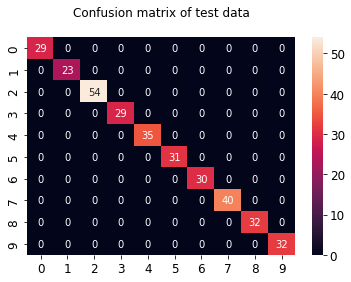

Saving figure model_confusion_matrix_errors


<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        32

    accuracy                           1.00       335
   macro avg       1.00      1.00      1.00       335
weighted avg       1.00      1.00      1.00       335



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_predict_prob_train_ag = model.predict(x_train_ag)
y_predict_train_ag= y_predict_prob_train_ag.argmax(axis=-1)
conf_mx_train_ag = confusion_matrix(y_train, y_predict_train_ag)

plot_confusion_matrix(y_train, y_predict_train_ag)
save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()
print(classification_report(y_train, y_predict_train_ag, target_names=['0','1','2','3','4','5','6','7','8','9'] ))



# compare the results after data augmentaion

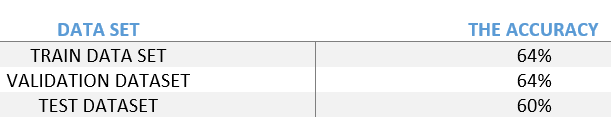

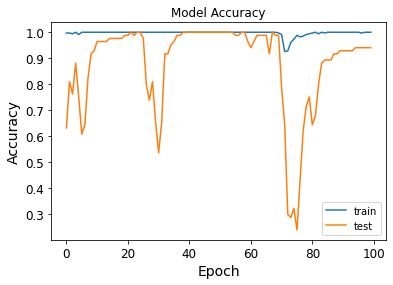

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history_ag.history :
    k = 'accuracy'    

if 'acc' in history_ag.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history_ag.history[k])
    plt.plot(history_ag.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()


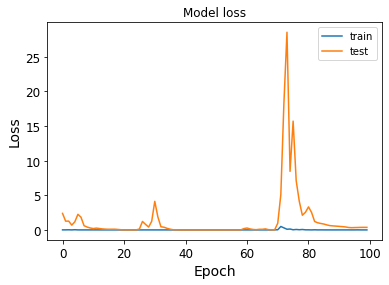

In [ ]:
plt.plot(history_ag.history['loss'])
plt.plot(history_ag.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

